Z obrázků cv05_robotS.bmp a cv05_PSS.bmp odstraňte šum:
a) pomocí metody prostého průměrování
b) pomocí metody s rotující maskou
c) pomocí mediánu
Ke všem výsledkům (a původnímu obrázku) zobrazte amplitudové
spektrum a histogram.



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

def crop(image, x, y, size) -> np.ndarray:
    top = max(y - size // 2, 0)
    bottom = min(y + size // 2 + 1, image.shape[0])
    left = max(x - size // 2, 0)
    right = min(x + size // 2 + 1, image.shape[1])

    return image[top:bottom, left:right]

def average_with_rotating_mask(image) -> np.ndarray:
    size = 3
    copy = np.zeros(image.shape)

    for y in range(0, image.shape[0]):
        for x in range(0, image.shape[1]):
            mask_1 = crop(image, x - 1, y - 1, size)
            mask_2 = crop(image, x - 1, y + 0, size)
            mask_3 = crop(image, x - 1, y + 1, size)
            mask_4 = crop(image, x,     y - 1, size)
            mask_5 = crop(image, x,     y + 1, size)
            mask_6 = crop(image, x + 1, y - 1, size)
            mask_7 = crop(image, x + 1, y + 0, size)
            mask_8 = crop(image, x + 1, y + 1, size)

            masks = [mask_1, mask_2, mask_3, mask_4, mask_5, mask_6, mask_7, mask_8]
            lowest_variance_index = np.argmin([np.var(x) for x in masks])

            copy[y, x] = np.mean(masks[lowest_variance_index])

    return copy


# Compute spectra
def compute_spectrum(img):
    fft = np.fft.fft2(img)
    spectrum = np.log(np.abs(np.fft.fftshift(fft)))
    return spectrum

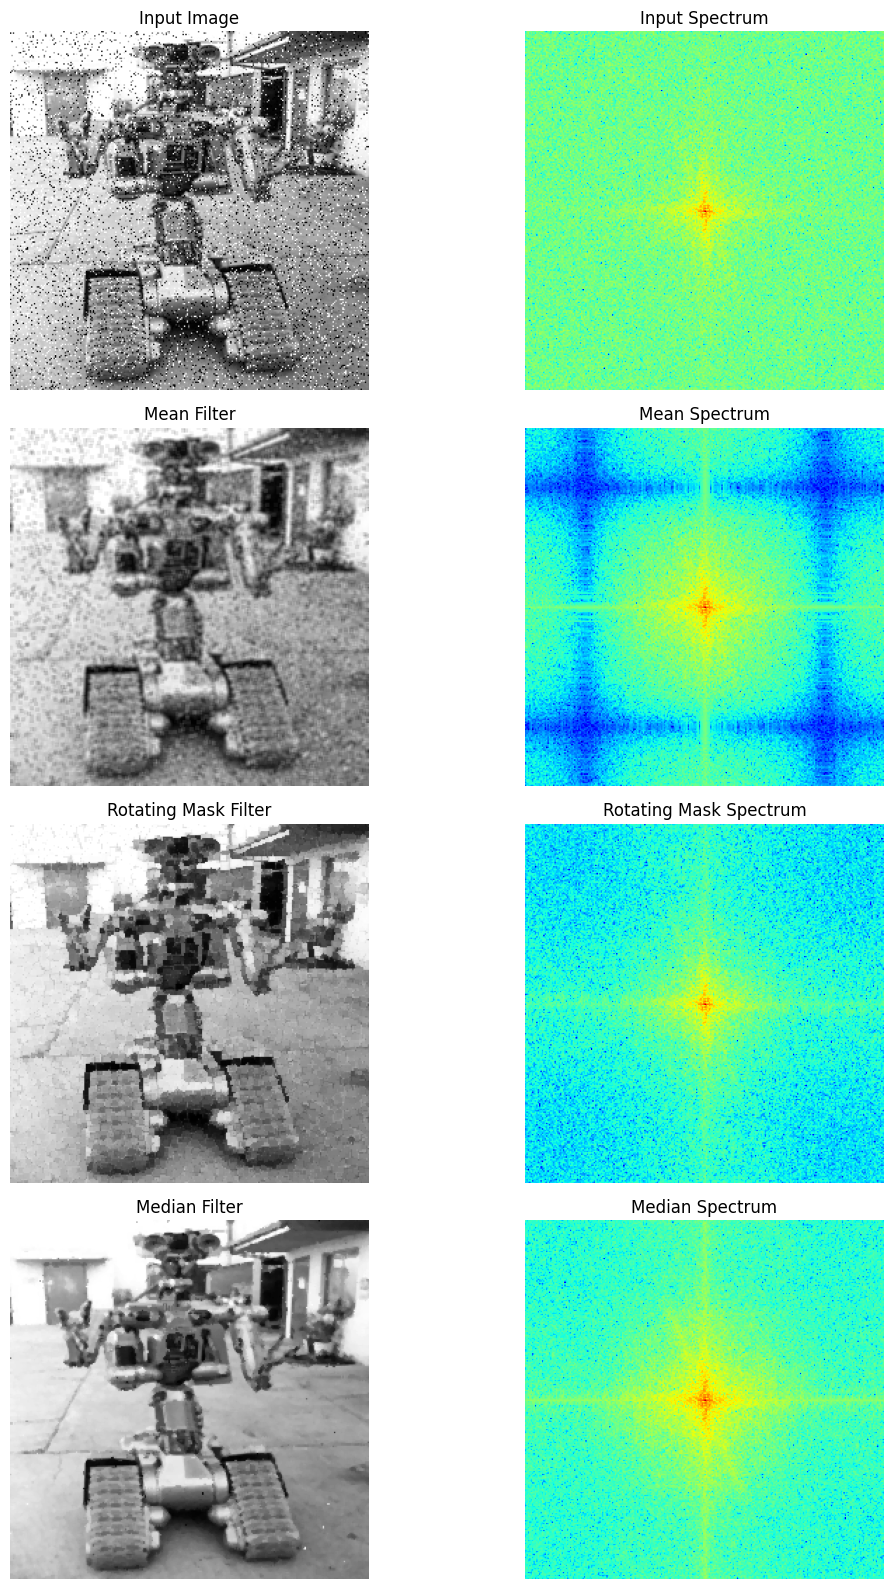

In [3]:
# Load image
image_path = Path("./ims/cv05_robotS.bmp")
image = cv2.imread(image_path.as_posix(), cv2.IMREAD_GRAYSCALE)

# Apply filters
kernel = 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
mean = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
rotation = average_with_rotating_mask(image)
median = cv2.medianBlur(image, 3)

spectrum_image = compute_spectrum(image)
spectrum_mean = compute_spectrum(mean)
spectrum_rotation = compute_spectrum(rotation)
spectrum_median = compute_spectrum(median)

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Input Image')

axes[0, 1].imshow(spectrum_image, cmap='jet')
axes[0, 1].set_title('Input Spectrum')

axes[1, 0].imshow(mean, cmap='gray')
axes[1, 0].set_title('Mean Filter')

axes[1, 1].imshow(spectrum_mean, cmap='jet')
axes[1, 1].set_title('Mean Spectrum')

axes[2, 0].imshow(rotation, cmap='gray')
axes[2, 0].set_title('Rotating Mask Filter')

axes[2, 1].imshow(spectrum_rotation, cmap='jet')
axes[2, 1].set_title('Rotating Mask Spectrum')

axes[3, 0].imshow(median, cmap='gray')
axes[3, 0].set_title('Median Filter')

axes[3, 1].imshow(spectrum_median, cmap='jet')
axes[3, 1].set_title('Median Spectrum')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
